The Broken Optimizer
Skill Focus: Logical Problem Solving & Parameter Tuning
Problem Statement
You are given a Python script intended to train a model to predict calories burned based on exercise
time. However, the model isn’t ”learning”—the Error (Loss) stays high or gets worse. Your job is to
find the bug and fix the parameters.
Task 1: The ”Bug Hunt”
Below is a snippet of the Gradient Descent loop from our lab. One line has a logical error that prevents
the ”Compass” from working correctly. Find it and fix it.
# BUGGY CODE SNIPPET
learning_rate = 0.01
weight = 0.5
for i in range (100) :
gradient = calculate_gradient ( data , weight )
# Logic Error is in the line below :
weight = weight + ( learning_rate * gradient )
print ( f" Iteration ␣{i} ,␣ Loss :␣{ calculate_loss ( weight )}")
Requirement: Explain in 1 sentence why adding the gradient instead of subtracting it makes the
model ”climb the hill” instead of ”finding the bottom.”
Task 2: Testing the ”Step Size”
Once the code is fixed, run the simulation with two different learning rate values:
1. learning rate = 0.000001
2. learning rate = 0.1
Submission:
• Provide the corrected code.
• A screenshot of the Loss Curve for both learning rates.
• Identify which rate was ”too slow” and which one ”converged” (reached the bottom) quickly.
Evaluation Criteria
• Logical Correction: Correcting the update rule (Subtraction vs Addition).
• Implementation: Successfully plotting the results using matplotlib.
• Analysis: Correct interpretation of how the Learning Rate affects the speed of the code.
1

In [13]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# Create DataSet
# Exercise time (hours)
data_x = np.array([1, 2, 3, 4, 5])

# Calories burned
data_y = np.array([5, 10, 15, 20, 25])


# Loss Function

In [15]:
# Mean Square Error
def calculate_loss(weight):
    predictions = weight * data_x
    return np.mean((predictions - data_y) ** 2)


# Gradient Function

In [16]:
def calculate_gradient(data_x, data_y, weight):
    predictions = weight * data_x
    return (2 / len(data_x)) * np.sum((predictions - data_y) * data_x)


In [17]:
def gradient_descent(learning_rate, iterations=100):
    weight = 0.5
    losses = []

    for i in range(iterations):
        gradient = calculate_gradient(data_x, data_y, weight)
        weight = weight - learning_rate * gradient   # ✅ FIXED
        loss = calculate_loss(weight)
        losses.append(loss)

    return losses


# Learning Rate (Too Small (0.000001))

In [18]:
loss_slow = gradient_descent(learning_rate=0.000001)


Run With Larger Learning rate (0.1)

In [19]:
loss_fast = gradient_descent(learning_rate=0.1)


# Plot

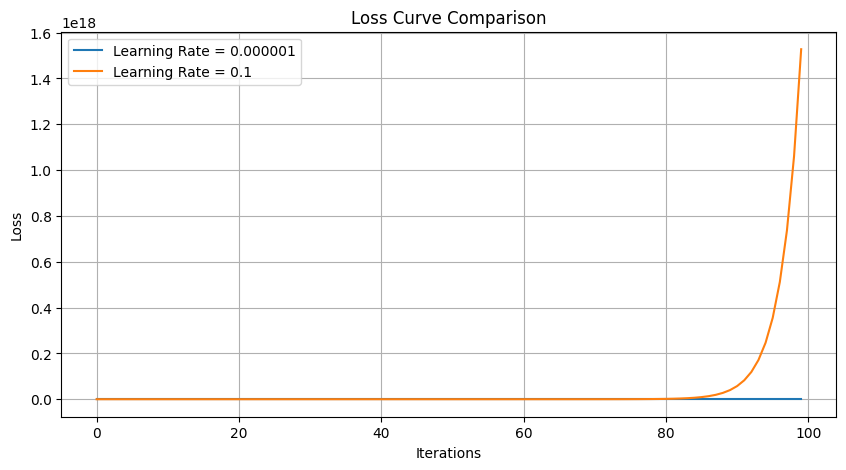

In [20]:
plt.figure(figsize=(10,5))

plt.plot(loss_slow, label="Learning Rate = 0.000001")
plt.plot(loss_fast, label="Learning Rate = 0.1")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve Comparison")
plt.legend()
plt.grid(True)

plt.show()
